In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from eda_module import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = pd.read_csv('data/churn_data.csv')
df = data.copy()

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [7]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df.nunique()} \n")

Rows: 7043 

Features: 21 

Missing Values: 0 

Unique Values: customerid          7043
gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64 



Our Data
We have 7043 rows (each representing a unique customer) with 21 columns: 19 features, 1 target feature (Churn)

Target:
Churn (binary)
Nominal Features:
Tenure
MonthlyCharges
TotalCharges
Categorical Features:
Gender
SeniorCitizen
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
1. General EDA
1.1 Target: Churn

In [8]:
# Replace all missing string values with 0
df.totalcharges = df.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
df.totalcharges = df.totalcharges.astype('float32')
df.to_csv('data/reg_data.csv')


def plot_target_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (20, 10))
    plt.subplot(121)
    plt.pie(df.churn.value_counts(),labels = ['No Churn', 'Churn'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 20, 'fontweight': 'bold'})
    plt.title('Churn Outcome Pie Chart', fontsize = 30, fontweight = 'bold')
    plt.subplot(122)
    t = sns.countplot(df.churn)
    t.set_xlabel('Churn', fontweight = 'bold', fontsize = 20)
    t.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    plt.title('Churn Outcome Distributions', fontsize = 30, fontweight = 'bold')
    plt.tight_layout()


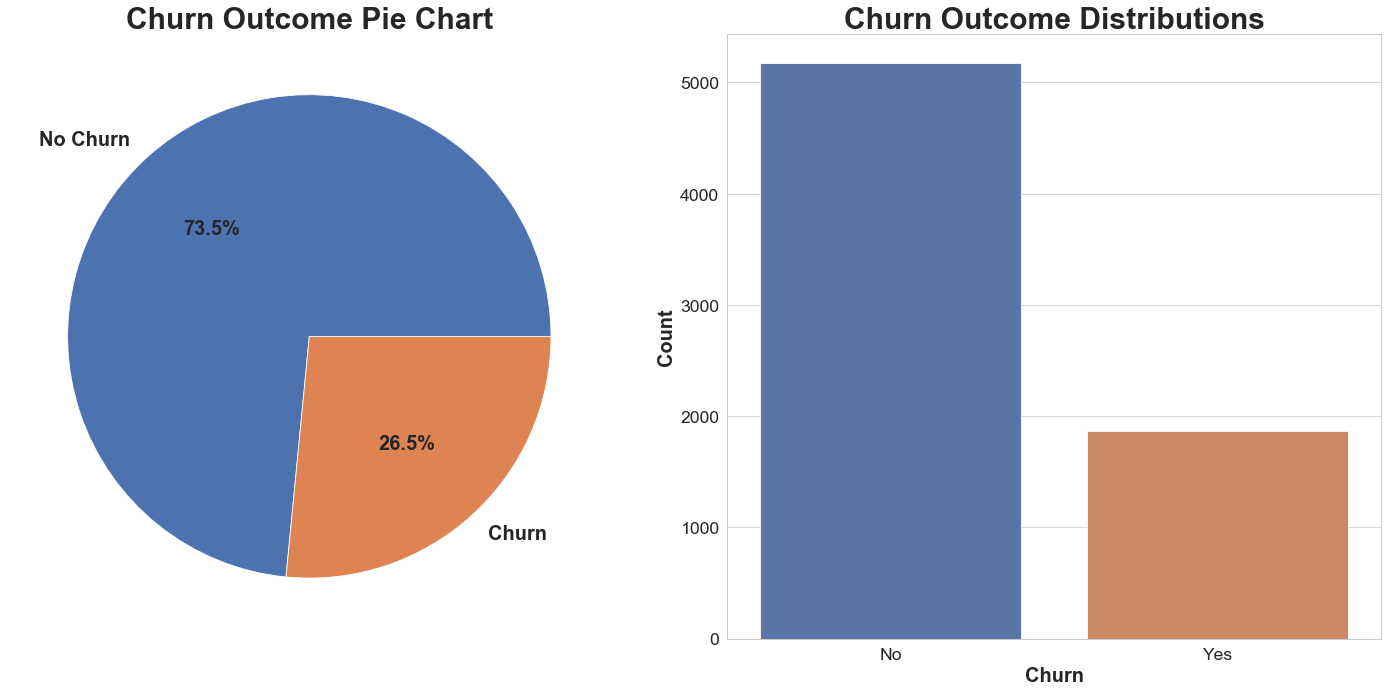

In [8]:
plot_target_dist(df)

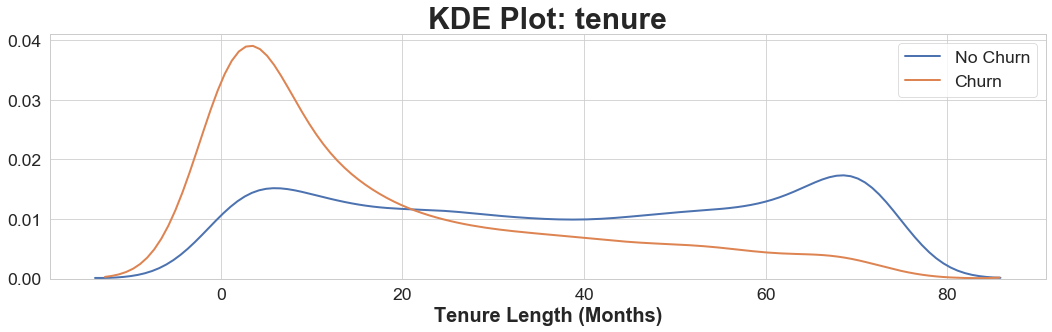

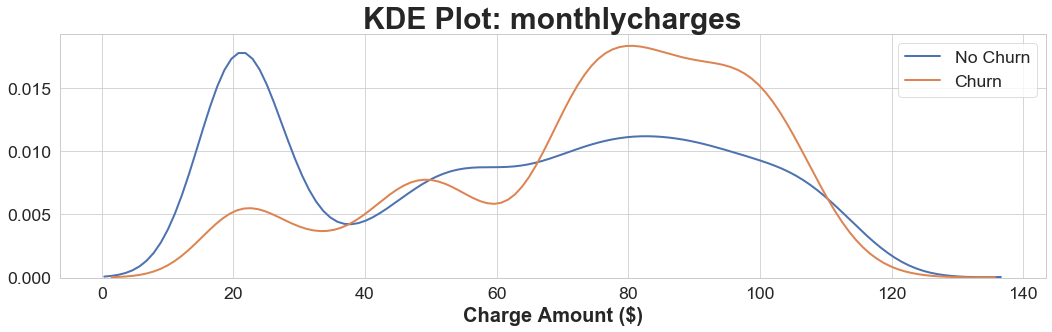

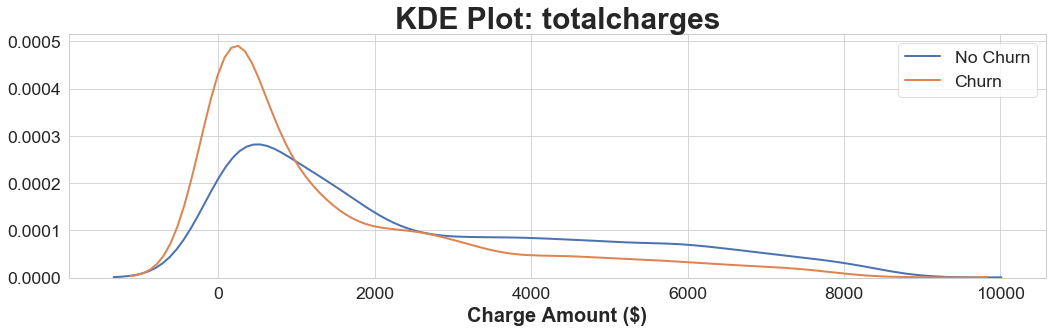

In [9]:
def plot_kde(df, feature):
    plt.figure(figsize = (15, 5))
    plt.title(f"KDE Plot: {feature}", fontsize = 30, fontweight = 'bold')
    ax = sns.kdeplot(df[df.churn == 'No'][feature].dropna(), label = 'No Churn', lw = 2, legend = True)
    plt.legend = True
    ax1 = sns.kdeplot(df[df.churn == 'Yes'][feature].dropna(), label = 'Churn', lw = 2, legend = True)
    if feature == 'tenure':
        plt.xlabel('Tenure Length (Months)', fontsize = 20, fontweight = 'bold')
    else:
        plt.xlabel('Charge Amount ($)', fontsize = 20, fontweight = 'bold')
    plt.tight_layout()

plot_kde(df, 'tenure')
plot_kde(df, 'monthlycharges')
plot_kde(df, 'totalcharges')   

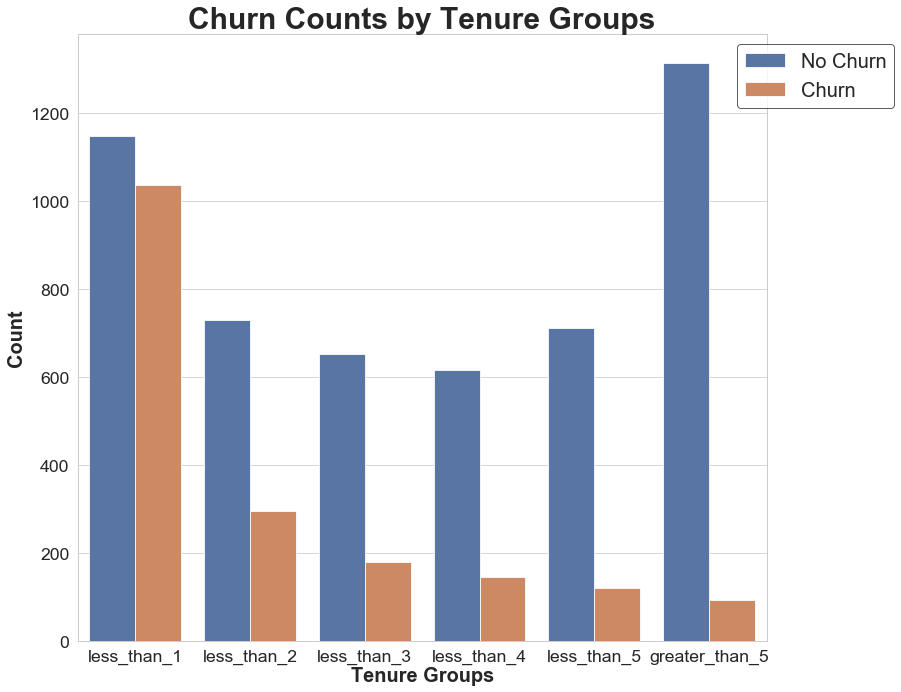

In [10]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)
tenure_group_counts(df)

def tenure_groups(df):
    if df.tenure <= 12:
        return "less_than_1"
    elif (df.tenure > 12) & (df.tenure <= 24):
        return "less_than_2"
    elif (df.tenure > 24) & (df.tenure <= 36):
        return "less_than_3"
    elif (df.tenure > 36) & (df.tenure <= 48):
        return "less_than_4"
    elif (df.tenure > 48) & (df.tenure <= 60):
        return "less_than_5"
    else:
        return "greater_than_5"
    
    
def tenure_group_counts(df):
    plt.figure(figsize = (13,10))
    t = sns.countplot(data = df, x = 'grouped_tenure', hue = 'churn', order = ['less_than_1', 'less_than_2', 'less_than_3', 'less_than_4', 'less_than_5', 'greater_than_5'])
    t.set_title('Churn Counts by Tenure Groups', fontsize = 30, fontweight = 'bold')
    t.set_xlabel('Tenure Groups',fontsize = 20, fontweight = 'bold', labelpad = 1.5)
    t.set_ylabel('Count', fontsize = 20, fontweight = 'bold')
    t.legend(loc = 'upper right', fontsize = 20, labels = ['No Churn', 'Churn'], edgecolor = 'black', bbox_to_anchor = (1.2, 1))
    plt.tight_layout()
    

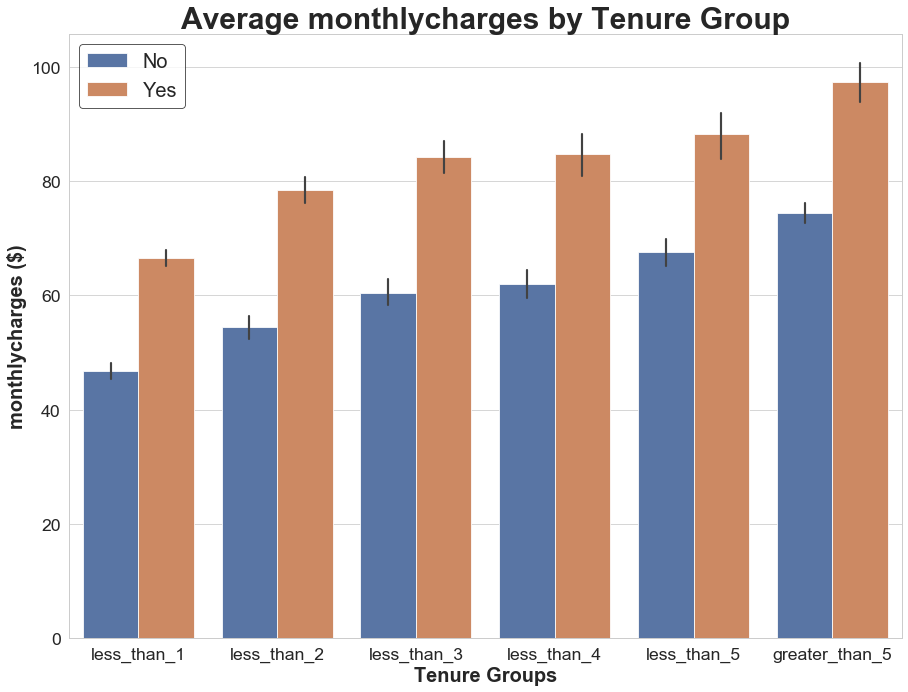

In [11]:
plot_numerical_averages(df, 'monthlycharges')

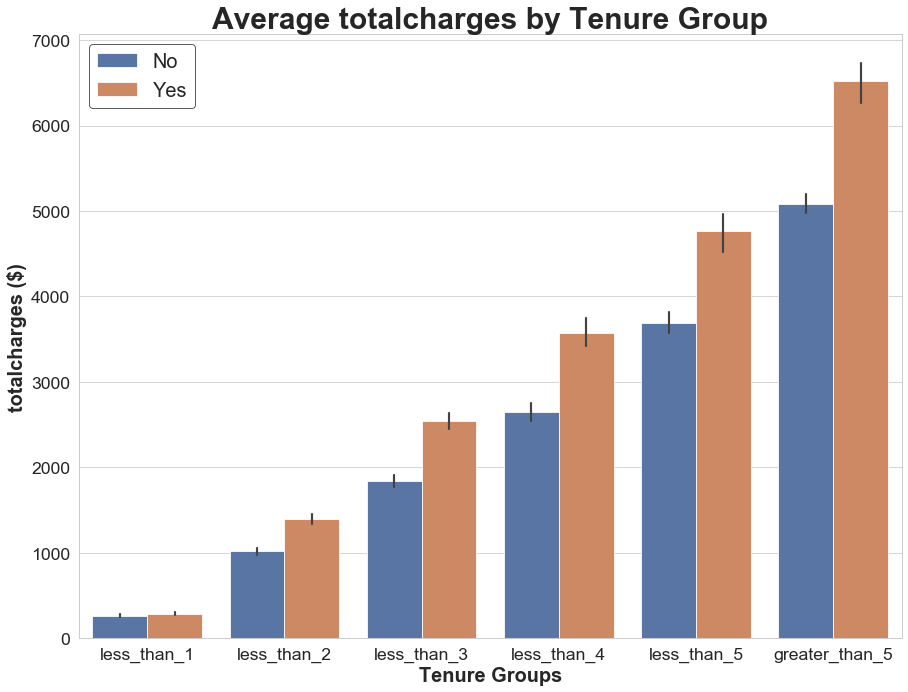

In [12]:
plot_numerical_averages(df, 'totalcharges')

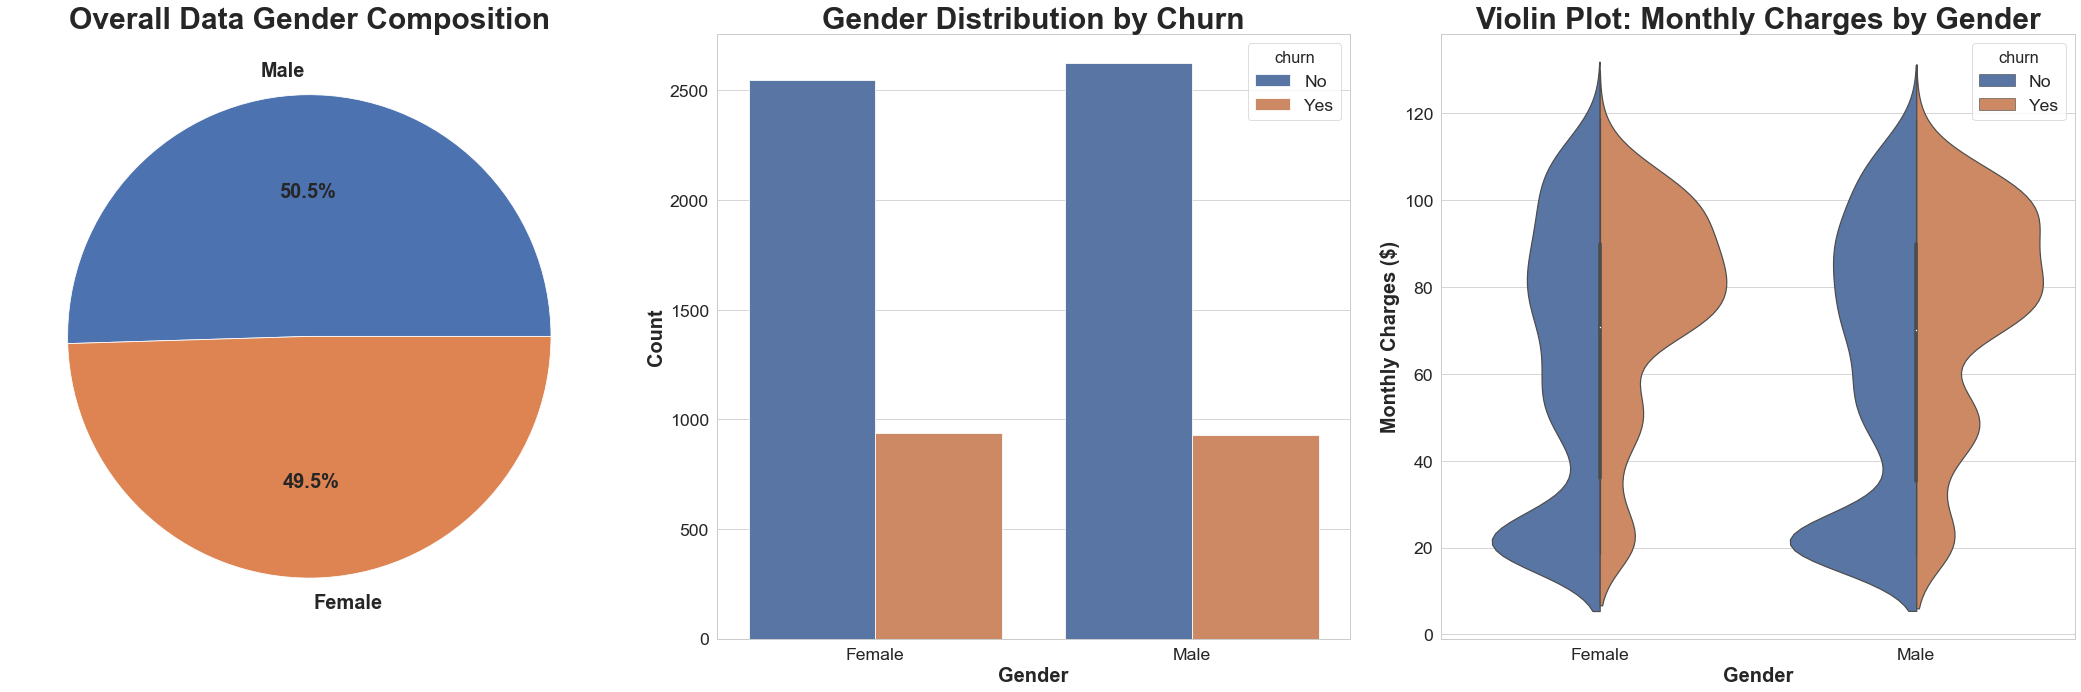

In [13]:
plot_gender_dist(df)

Gender Conclusion: Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn

3.2 Age

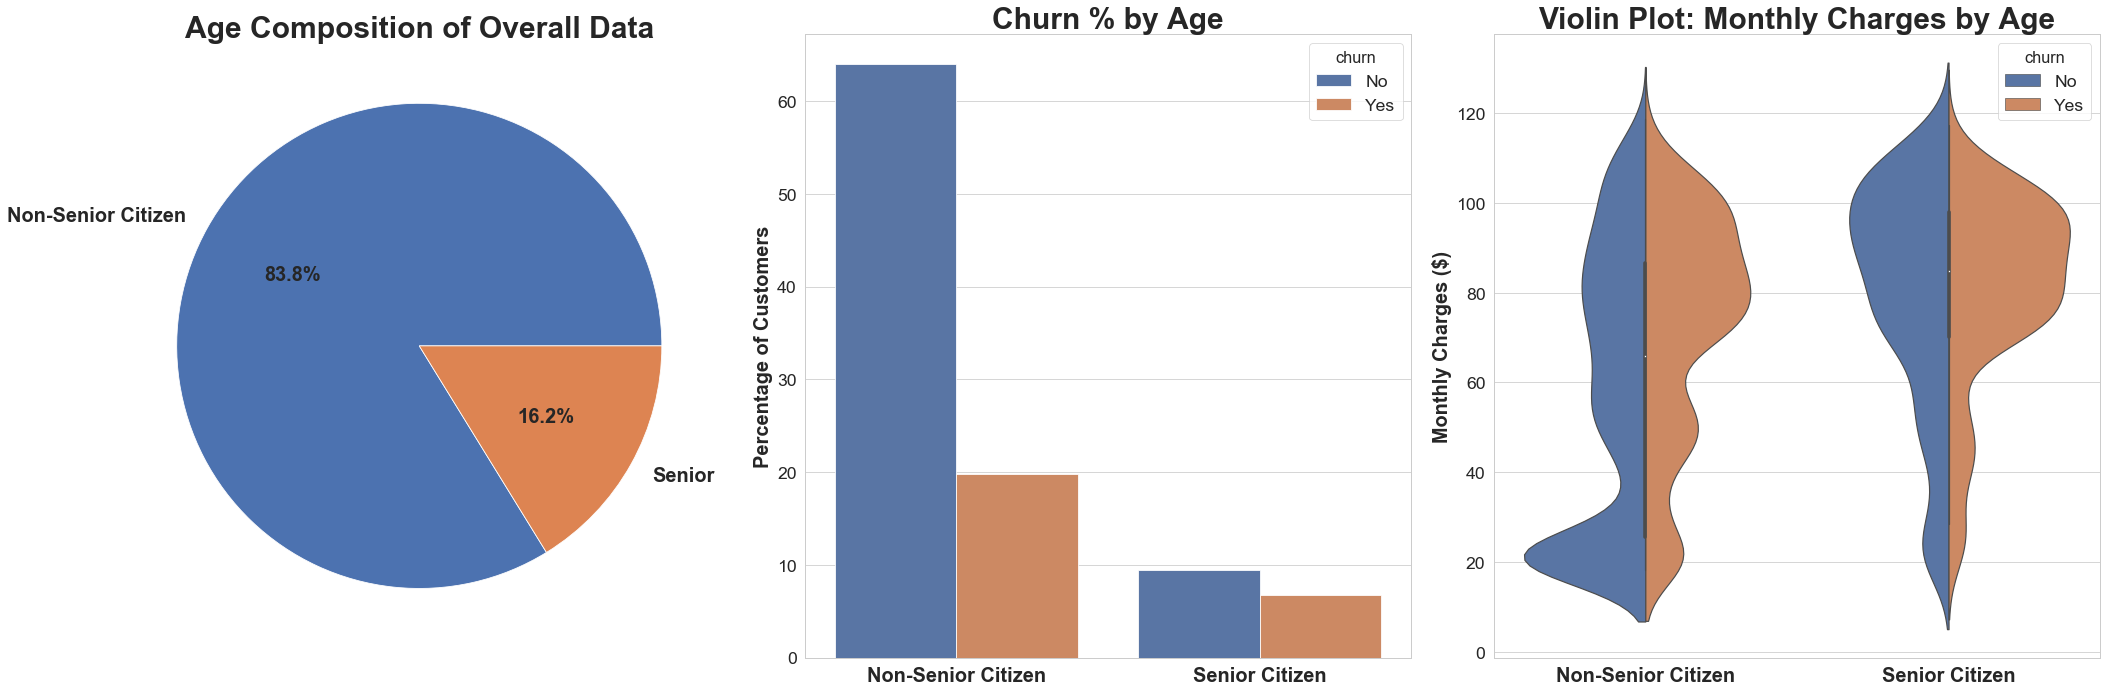

In [14]:
plot_age_dist(df)

def plot_gender_dist(df):
    sns.set(style = 'whitegrid')
    sns.set_context('paper', font_scale = 2)
    fig = plt.figure(figsize = (30,10))
    
    plt.subplot(131)
    plt.pie(df.gender.value_counts(), labels = ['Male', 'Female'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Overall Data Gender Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    a = sns.countplot(data = df, x = 'gender', hue = 'churn')
    a.set_title('Gender Distribution by Churn', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Gender', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Count', fontweight = 'bold', fontsize = 20)
    
    plt.subplot(133)
    x = sns.violinplot('gender', 'monthlycharges', 'churn', df, split = True)
    x.set_title('Violin Plot: Monthly Charges by Gender', fontsize = 30, fontweight = 'bold')
    x.set_xlabel('Gender', fontsize = 20, fontweight = 'bold')
    x.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    
    plt.tight_layout()

Age Conclusion:

Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
Overall, more non-senior citizens churn than senior citizens
A higher proportion of senior citizens churn than non-senior citizens
3.3 Partner & Dependent

In [15]:
df[df.churn == 'Yes'].partner.value_counts()

No     1200
Yes     669
Name: partner, dtype: int64

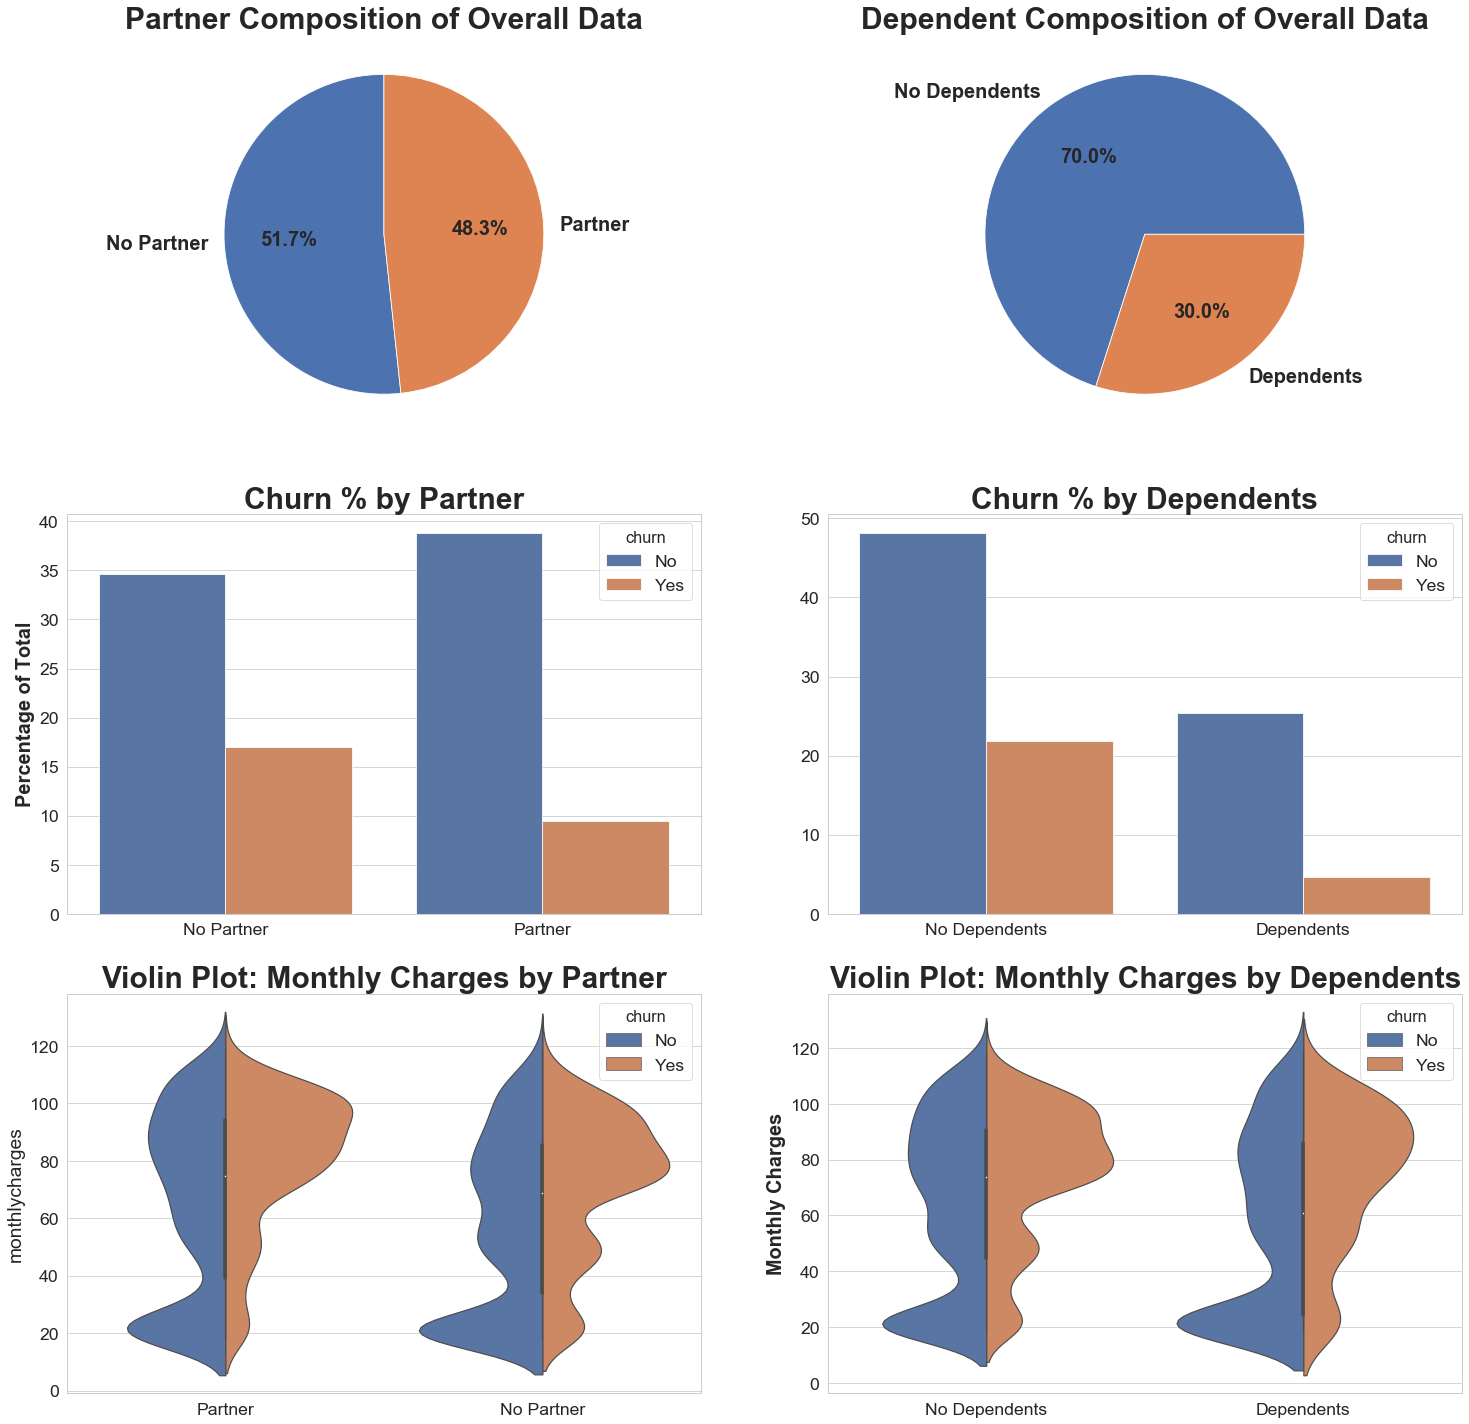

In [18]:
def plot_partner_dependents(df):
    
    fig = plt.figure(figsize = (25,25))
    x = df.copy()
    plt.subplot(321)
    plt.pie(df.partner.value_counts(), labels = ['No Partner', 'Partner'], autopct = '%.1f%%', radius = 1, textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = 90)
    plt.title('Partner Composition of Overall Data', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(322)
    plt.pie(df.dependents.value_counts(), labels = ['No Dependents', 'Dependents'], autopct = '%.1f%%', radius = 1,  textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Dependent Composition of Overall Data', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(323)
    x = df.copy()
    x = x.groupby('partner')['churn'].value_counts().to_frame()
    x = x.rename({'churn':'pct_total'}, axis = 1).reset_index()
    x['pct_total'] = (x['pct_total']/len(df)) * 100
    u = sns.barplot('partner', y = 'pct_total', hue = 'churn', data = x)
    u.set_title('Churn % by Partner', fontweight = 'bold', fontsize = 30)
    u.set(xticklabels = ['No Partner', 'Partner'])
    u.set_xlabel('')
    u.set_ylabel('Percentage of Total', fontweight = 'bold', fontsize = 20)
    
    plt.subplot(324)
    y = df.copy()
    y = y.groupby('dependents')['churn'].value_counts().to_frame()
    y = y.rename({'churn':'pct_total'}, axis = 1).reset_index()
    y['pct_total'] = (y['pct_total']/len(df)) * 100
    v = sns.barplot('dependents', y = 'pct_total', hue = 'churn', data = y)
    v.set_title('Churn % by Dependents', fontweight = 'bold', fontsize = 30)
    v.set(xticklabels = ['No Dependents', 'Dependents'])
    v.set_xlabel('')
    v.set_ylabel('')
    
    plt.subplot(325)
    y = sns.violinplot('partner', 'monthlycharges', 'churn', df, split = True)
    y.set_title('Violin Plot: Monthly Charges by Partner', fontweight = 'bold', fontsize = 30)
    y.set_xticklabels(['Partner', 'No Partner'])
    y.set_xlabel('')
    
    plt.subplot(326)
    z = sns.violinplot('dependents', 'monthlycharges', 'churn', df, split = True)
    z.set_title('Violin Plot: Monthly Charges by Dependents', fontweight = 'bold', fontsize = 30)
    z.set_xticklabels(['No Dependents', 'Dependents'])
    z.set_xlabel('')
    z.set_ylabel('Monthly Charges', fontweight = 'bold', fontsize = 20)



plot_partner_dependents(df)


Partner/Dependent Conclusions:

Overall, those without partners are more likely to churn than those with partners
Customers without dependents are more likely to churn than those with dependents

In [ ]:
3.4 Phone Services & Line Quantities

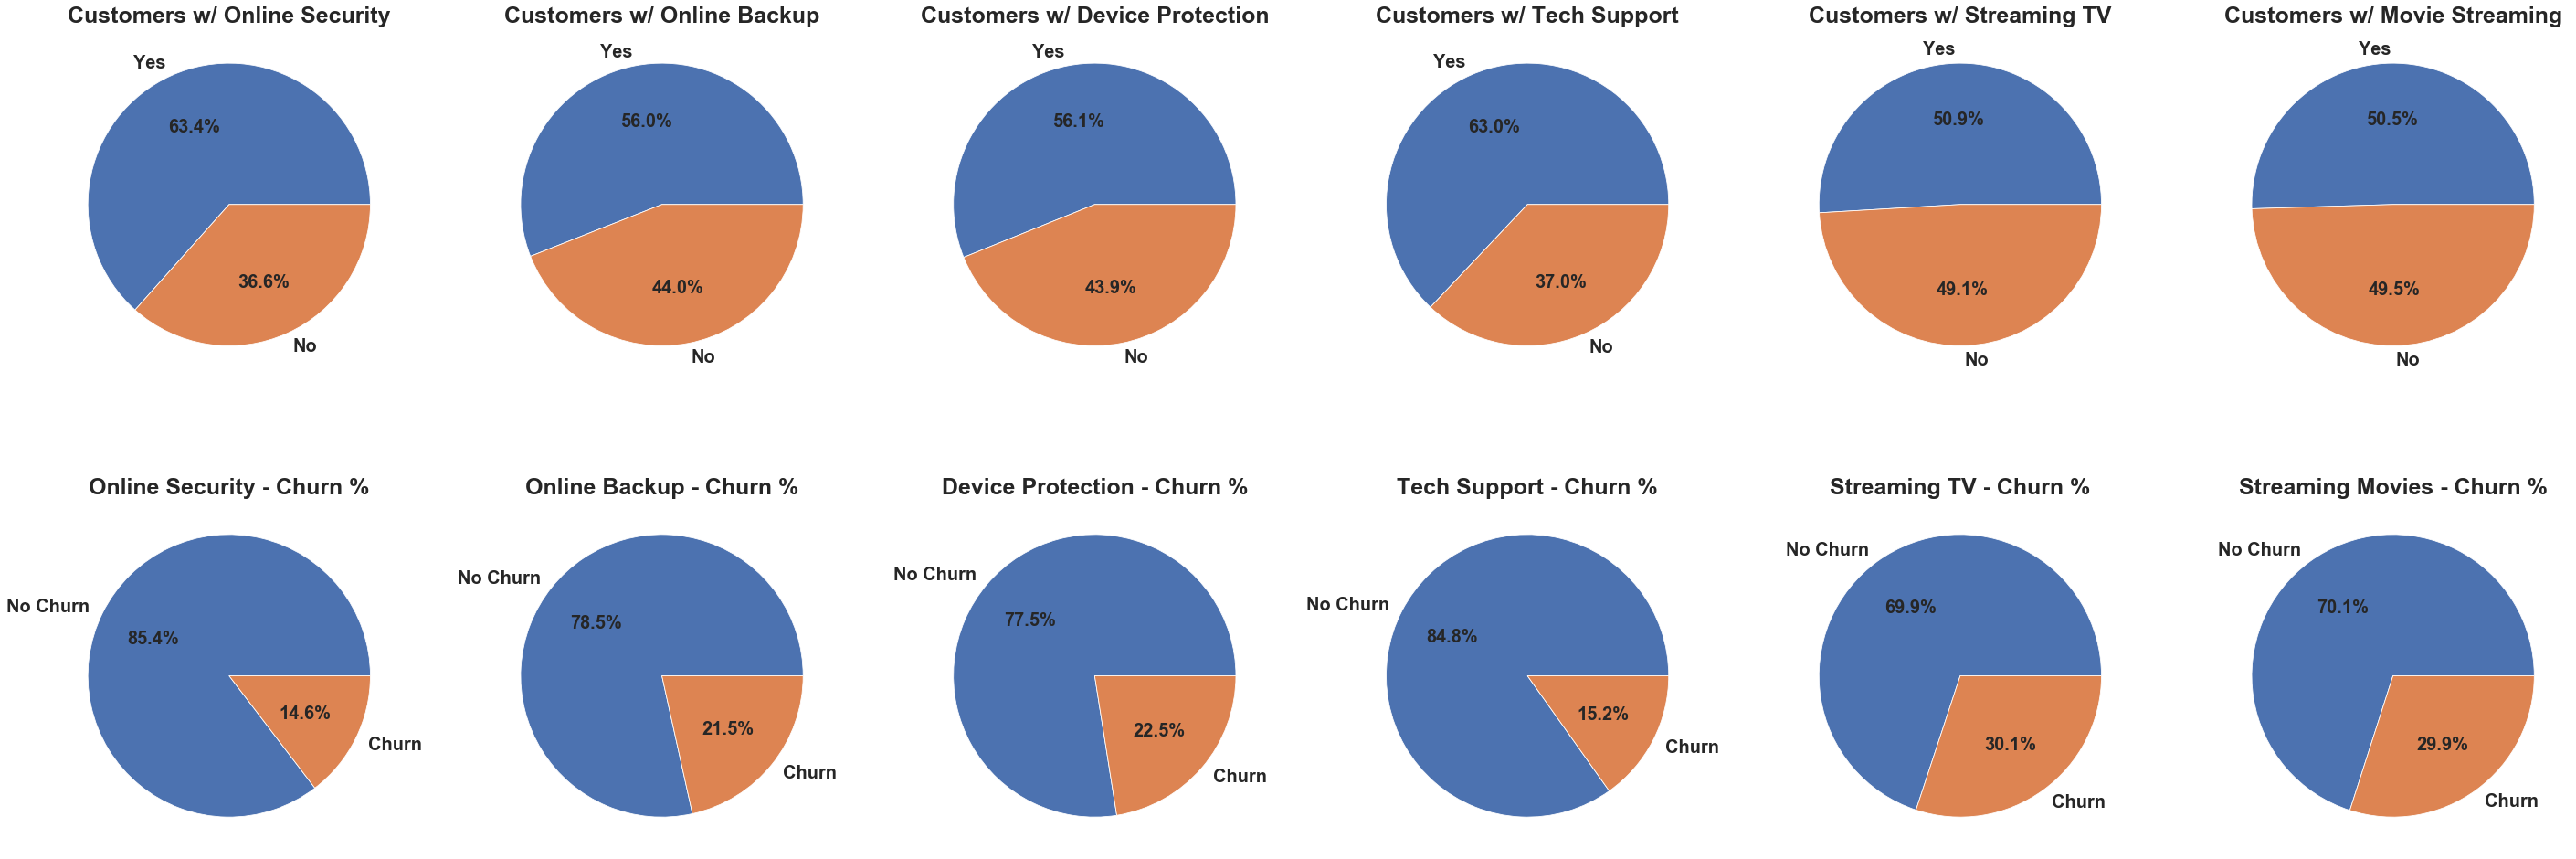

In [11]:
plot_services(df)
def plot_services(df):
    copy = df[df.internetservice != 'No']
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(copy.onlinesecurity.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(262)
    plt.pie(copy.onlinebackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(263)
    plt.pie(copy.deviceprotection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(264)
    plt.pie(copy.techsupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(265)
    plt.pie(copy.streamingtv.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(266)
    plt.pie(copy.streamingmovies.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(267)
    copy1 = copy[copy.onlinesecurity == 'Yes']
    plt.pie(copy1.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(268)
    copy2 = copy[copy.onlinebackup == 'Yes']
    plt.pie(copy2.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(269)
    copy3 = copy[copy.deviceprotection == 'Yes']
    plt.pie(copy3.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,10)
    copy4 = copy[copy.techsupport == 'Yes']
    plt.pie(copy4.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,11)
    copy5 = copy[copy.streamingtv == 'Yes']
    plt.pie(copy5.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,12)
    copy6 = copy[copy.streamingmovies == 'Yes']
    plt.pie(copy6.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()


**Phone Service Conclusions:**
- Significantly more customers with only phone service will not churn than those other customers
- People with only phone service churn ~25% of the time
- Customers with phone services only pay a higher average monthly charge
- Customers with multiple lines churn at approximately the same rate as those with a singular line
- Customers with multiple lines more frequently pay a higher monthly charge than those with singular phone lines

3.5 Internet Service

In [1]:
def plot_internet_services(df):
    
    copy = df.copy()
    fig = plt.figure(figsize = (30, 10))

    plt.subplot(131)
    plt.pie(copy.internetservice.value_counts(), labels = ['Fiber Optic', 'DSL', 'No Internet'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight': 'bold'}, startangle = 180)
    plt.title('Internet Service Composition of Customers', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    copy = copy.groupby('internetservice')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    d = sns.barplot('internetservice', y = 'pct_total', hue = 'churn', data = copy)
    d.set_title('% Churn by Internet Service', fontweight= 'bold', fontsize = 30)
    d.set_xlabel('')
    d.set_ylabel('% of Customers', fontweight = 'bold', fontsize = 20)
    d.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    
    plt.subplot(133)
    e = sns.violinplot('internetservice', 'monthlycharges', 'churn', df, split = True)
    e.set_title('Violin Plot: Monthly Charges by Internet Service', fontweight = 'bold', fontsize = 30)
    e.set_xlabel('')
    e.set(xticklabels = ['DSL', 'Fiber Optic', 'No Internet Service'])
    e.set_ylabel('Monthly Charges($)', fontweight = 'bold', fontsize = 30)

    fig.tight_layout()
    
    
plot_internet_services(df)

NameError: name 'df' is not defined

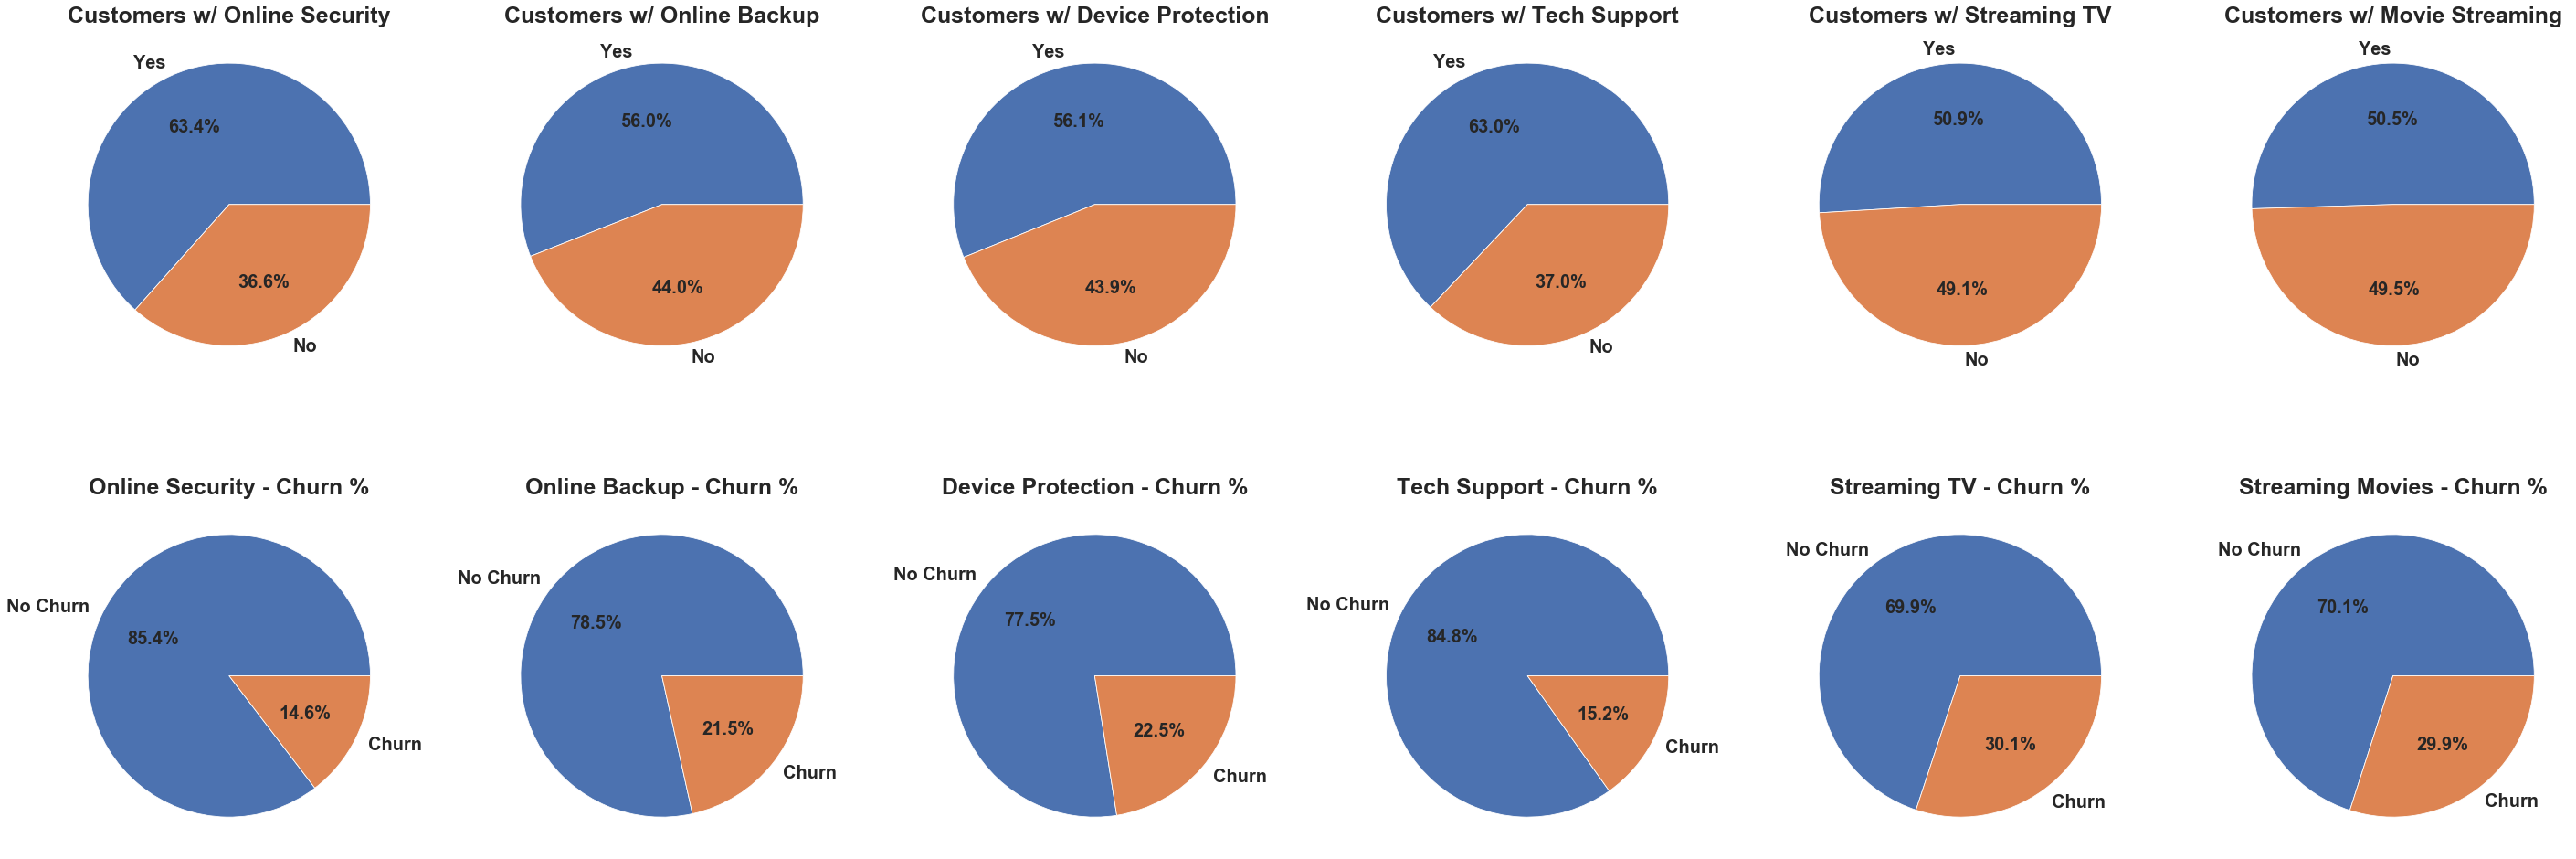

In [26]:



def plot_services(df):
    copy = df[df.internetservice != 'No']
    
    fig = plt.figure(figsize = (40, 15))
    
    plt.subplot(261)
    plt.pie(copy.onlinesecurity.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Security', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(262)
    plt.pie(copy.onlinebackup.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Online Backup', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(263)
    plt.pie(copy.deviceprotection.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Device Protection', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(264)
    plt.pie(copy.techsupport.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Tech Support', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(265)
    plt.pie(copy.streamingtv.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Streaming TV', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(266)
    plt.pie(copy.streamingmovies.value_counts(), labels = ['Yes', 'No'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Customers w/ Movie Streaming', fontweight = 'bold', fontsize = 25)
    
    plt.subplot(267)
    copy1 = copy[copy.onlinesecurity == 'Yes']
    plt.pie(copy1.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Security - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(268)
    copy2 = copy[copy.onlinebackup == 'Yes']
    plt.pie(copy2.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Online Backup - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(269)
    copy3 = copy[copy.deviceprotection == 'Yes']
    plt.pie(copy3.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Device Protection - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,10)
    copy4 = copy[copy.techsupport == 'Yes']
    plt.pie(copy4.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Tech Support - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,11)
    copy5 = copy[copy.streamingtv == 'Yes']
    plt.pie(copy5.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming TV - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.subplot(2,6,12)
    copy6 = copy[copy.streamingmovies == 'Yes']
    plt.pie(copy6.churn.value_counts(), labels = ['No Churn', 'Churn'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'})
    plt.title('Streaming Movies - Churn %', fontsize = 25, fontweight = 'bold')
    
    plt.tight_layout()
    
plot_services(df)


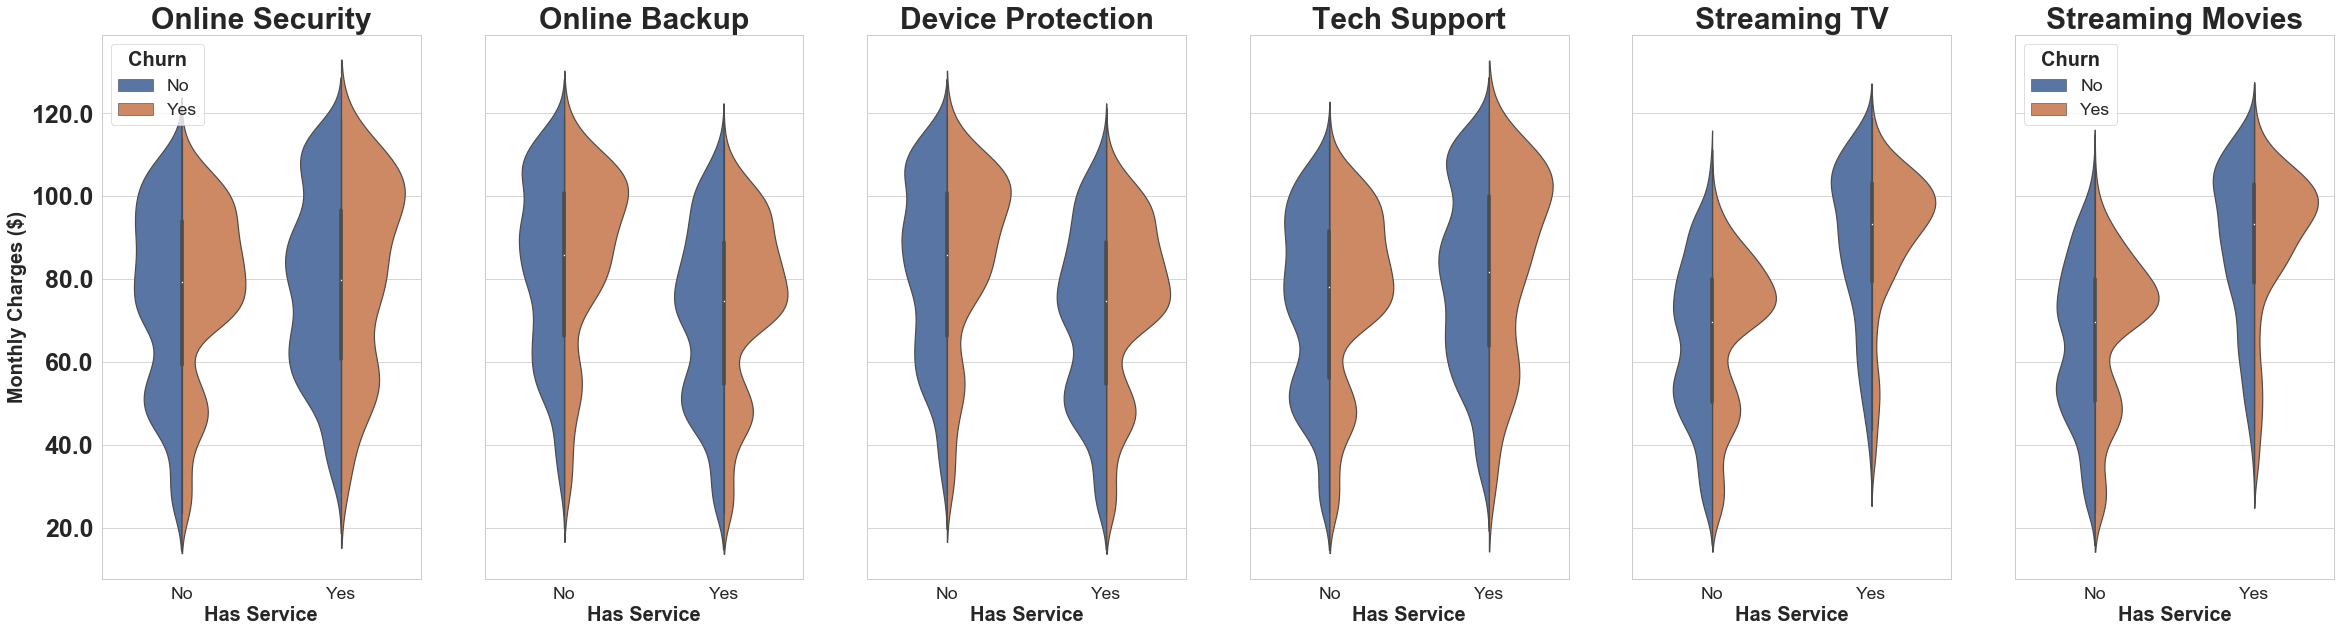

In [27]:
def plot_service_charges(df):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 6, figsize = (40, 10), sharex = True, sharey = True)
    
    copy1 = df[df.onlinesecurity != 'No internet service']
    a = sns.violinplot('onlinesecurity', 'monthlycharges', 'churn', copy1, split = True, ax = axes[0])
    a.set_title('Online Security', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    a.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    a.set_yticklabels(a.get_yticks(), size = 25, weight = 'bold')
    a.legend(loc = 'upper left', )
    a.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})

    copy2 = df[df.onlinebackup != 'No internet service']
    b = sns.violinplot('onlinebackup', 'monthlycharges', 'churn', copy2, split = True, ax = axes[1])
    b.set_title('Online Backup', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    b.set_ylabel('')
    b.legend_.remove()
    
    copy3 = df[df.deviceprotection != 'No internet service']
    c = sns.violinplot('onlinebackup', 'monthlycharges', 'churn', copy3, split = True, ax = axes[2])
    c.set_title('Device Protection', fontweight = 'bold', fontsize = 30)
    c.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    c.set_ylabel('')
    c.legend_.remove()
    
    copy4 = df[df.techsupport != 'No internet service']
    d = sns.violinplot('techsupport', 'monthlycharges', 'churn', copy3, split = True, ax = axes[3])
    d.set_title('Tech Support', fontsize = 30, fontweight = 'bold')
    d.set_xlabel('Has Service', fontsize = 20, fontweight = 'bold')
    d.set_ylabel('')
    d.legend_.remove()
    
    copy5 = df[df.streamingtv != 'No internet service']
    e = sns.violinplot('streamingtv', 'monthlycharges', 'churn', copy4, split = True, ax = axes[4])
    e.set_title('Streaming TV', fontsize = 30, fontweight = 'bold')
    e.set_xlabel('Has Service', fontweight = 'bold', fontsize = 20)
    e.set_ylabel('')
    e.legend_.remove()
    
    copy5 = df[df.streamingmovies != 'No internet service']
    f = sns.violinplot('streamingmovies', 'monthlycharges', 'churn', copy5, split = True, ax = axes[5])
    f.set_title('Streaming Movies', fontweight = 'bold', fontsize = 30)
    f.set_xlabel('Has Service', fontsize = 20, fontweight = 'bold')
    f.set_ylabel('')
    f.legend(loc = 'upper left')
    f.legend_.set_title('Churn', prop = {'size': 20, 'weight':'bold'})
    
    
plot_service_charges(df)

**Add-On Service Conclusions:**
- Customers with TV Streaming and/or Movie streaming services churn more than all other services. 
- Churn for customers in most categories peaks around a monthly charge of $100

## 3.7 Contracts

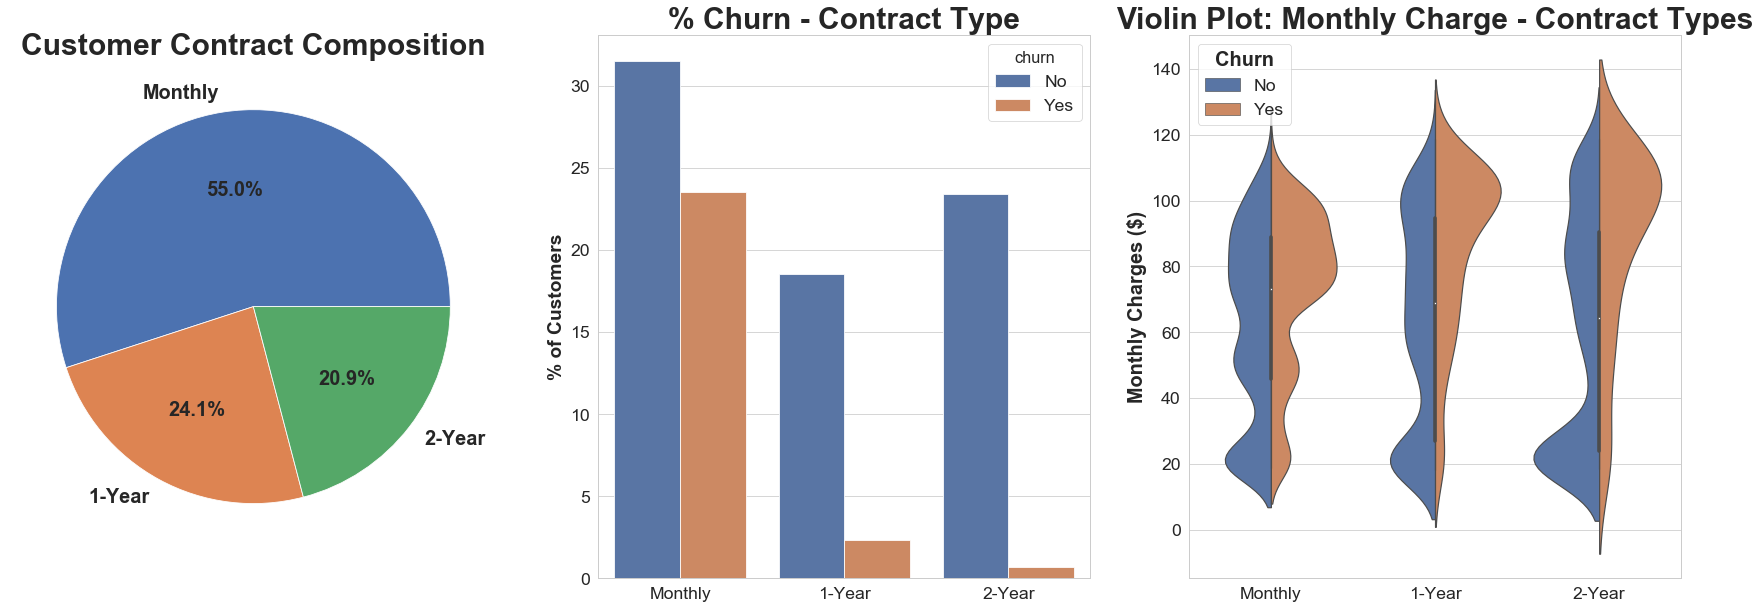

In [31]:
def plot_contracts(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.contract.value_counts(), labels = ['Monthly', '1-Year', '2-Year'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Contract Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Contract Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('contract')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('contract', y = 'pct_total', hue = 'churn', data = copy)
    a.set_title('% Churn - Contract Type', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sns.violinplot('contract', 'monthlycharges', 'churn', df, split = True)
    b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    b.set(xticklabels = ['Monthly', '1-Year', '2-Year'])
    b.legend(loc = 'upper left')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})



plot_contracts(df)


**Contract Conclusion:**
- More than half of customers use a monthly payment option
- Significantly more customers churn on monthly plans
- The longer the plan, the lower the churn rate
- Monthly charges are generally higher the longer the contract is

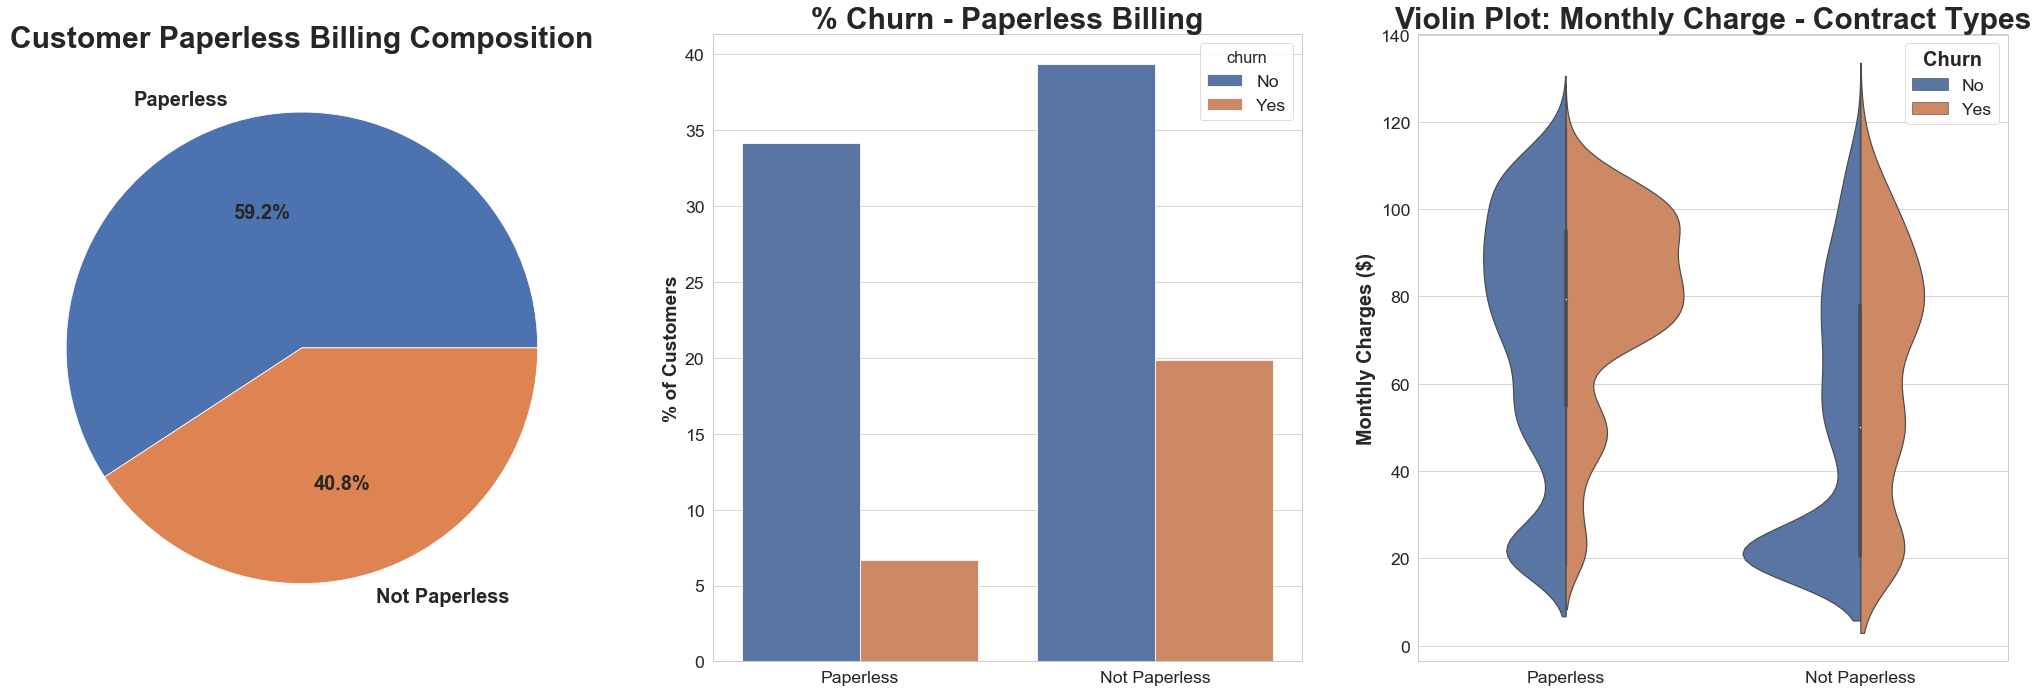

In [37]:
def plot_paperless(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.paperlessbilling.value_counts(), labels = ['Paperless', 'Not Paperless'], autopct = '%.1f%%', textprops = {'fontweight':'bold', 'fontsize': 20})
    plt.title('Customer Paperless Billing Composition', fontweight = 'bold', fontsize = 30)
    
    plt.subplot(132)
    plt.title('Churn % by Billing Type', fontsize = 30, fontweight = 'bold')
    copy = copy.groupby('paperlessbilling')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df)) * 100
    a = sns.barplot('paperlessbilling', y = 'pct_total', hue = 'churn', data = copy)
    a.set_title('% Churn - Paperless Billing', fontsize = 30, fontweight = 'bold')
    a.set(xticklabels = ['Paperless', 'Not Paperless'])
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontweight = 'bold')
    
    plt.subplot(133)
    b = sns.violinplot('paperlessbilling', 'monthlycharges', 'churn', df, split = True)
    b.set_title('Violin Plot: Monthly Charge - Contract Types', fontweight = 'bold', fontsize = 30)
    b.set_xlabel('')
    b.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 20)
    b.set(xticklabels = ['Paperless', 'Not Paperless'])
    b.legend(loc = 'upper right')
    b.legend_.set_title('Churn', prop = {'weight':'bold', 'size':20})
    
    plt.tight_layout()
    
plot_paperless(df)

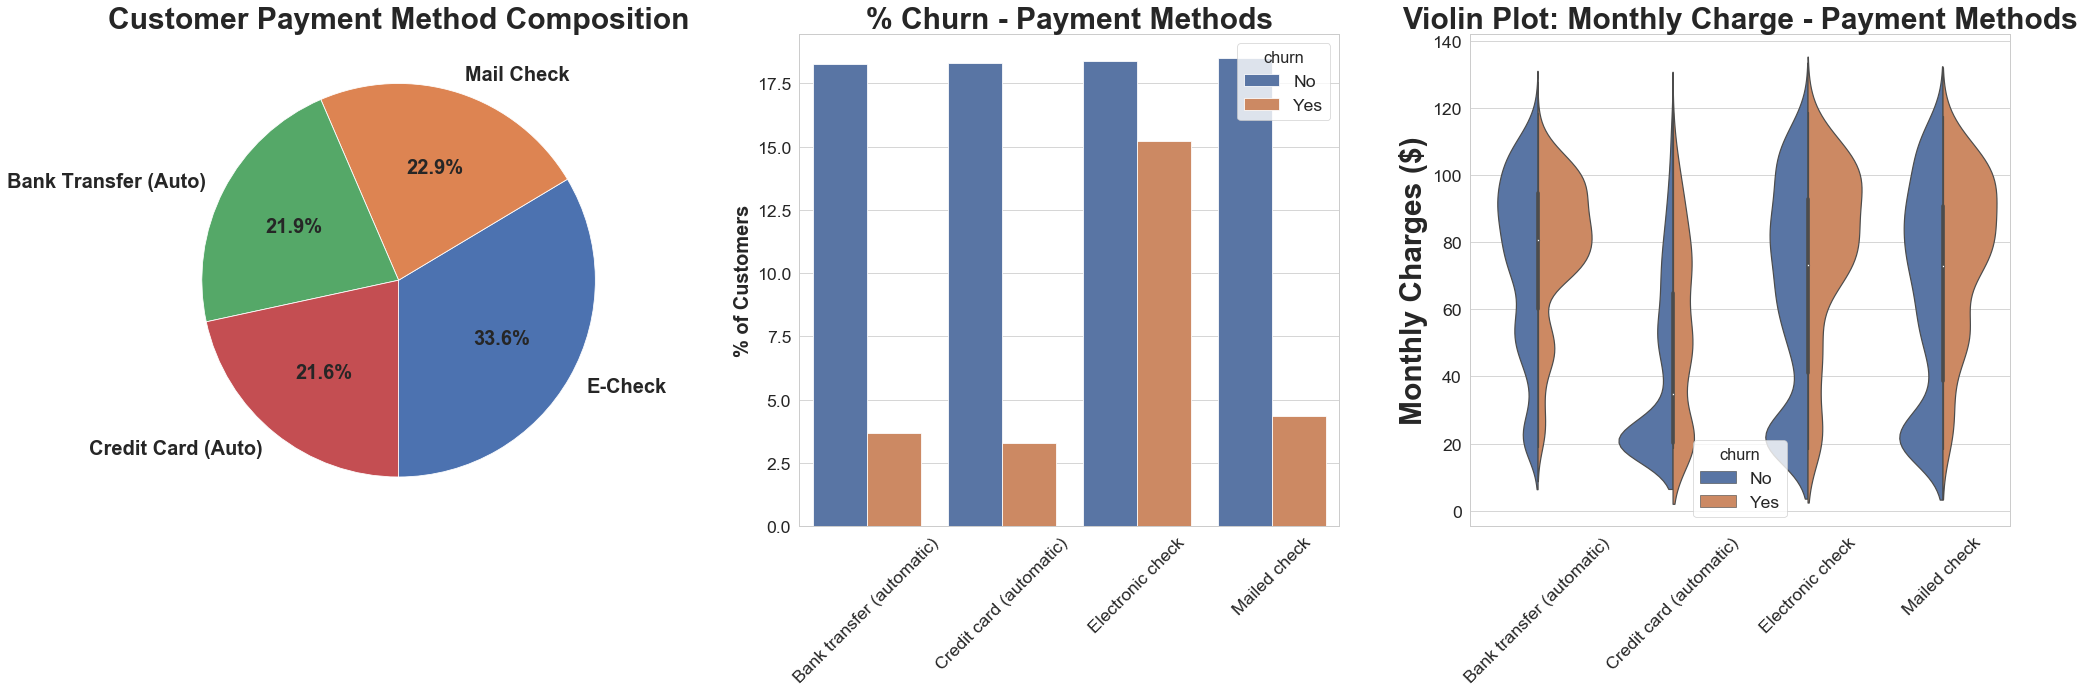

In [38]:
def plot_pay_methods(df):
    
    copy = df.copy()
    
    plt.figure(figsize = (30, 10))
    
    plt.subplot(131)
    plt.pie(copy.paymentmethod.value_counts(), labels = ['E-Check', 'Mail Check' , 'Bank Transfer (Auto)', 'Credit Card (Auto)'], autopct = '%.1f%%', textprops = {'fontsize':20, 'fontweight':'bold'}, startangle = -90)
    plt.title('Customer Payment Method Composition', fontsize = 30, fontweight = 'bold')
    
    plt.subplot(132)
    copy = copy.groupby('paymentmethod')['churn'].value_counts().to_frame()
    copy = copy.rename({'churn':'pct_total'}, axis = 1).reset_index()
    copy['pct_total'] = (copy['pct_total']/len(df))*100
    a = sns.barplot('paymentmethod', 'pct_total', 'churn', data = copy)
    a.set_title('% Churn - Payment Methods', fontsize = 30, fontweight = 'bold')
    a.set_xlabel('')
    a.set_ylabel('% of Customers', fontsize = 20, fontweight = 'bold')
    a.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
    plt.subplot(133)
    c = sns.violinplot('paymentmethod', 'monthlycharges', 'churn', df, split = True)
    c.set_title('Violin Plot: Monthly Charge - Payment Methods', fontsize = 30, fontweight = 'bold')
    c.set_xlabel('')
    c.set_ylabel('Monthly Charges ($)', fontweight = 'bold', fontsize = 30)
    c.set_xticklabels(a.get_xticklabels(), rotation = 45)
    
    plt.tight_layout()
    
    
plot_pay_methods(df)

**Payments Conclusions:**
- Customers with non-paperless billing churn almost 15% more than paperless customers
- Paperless customers churn at similar rates as non-paperless customers when the monthly price is below 60 dollars, once above 60 more paperless customers churn than non-paperless
- Customers who pay with e-check churn more than 10% than customers with all other payment methods
- Customers who pay by credit card have consistent churn rates regardless of monthly charge, whereas customers paying by bank transfer, e-chcek, or mailed check all see an up-tick in churn once monthly charges rise above 60.
